In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm

# # 解决 Matplotlib 中文乱码问题
# 指定字体路径（请检查你的具体字体文件路径）
font_path = "/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc"  # 适用于 Noto Sans CJK SC

# 加载字体
font_prop = fm.FontProperties(fname=font_path)

# 设置 Matplotlib 使用这个字体
plt.rcParams["font.family"] = font_prop.get_name()

pd.options.display.max_rows = None  # 显示所有行
pd.options.display.max_columns = None  # 显示所有列

# 读取 Excel 文件
data_path = "/private/workspace/cyt/bone_age_assessment/data/data_yuwei/raw/data_all.xlsx"
df = pd.read_excel(data_path)
df["RC骨龄"] = pd.to_numeric(df["RC骨龄"], errors="coerce")

# **转换年龄为月龄**
df["RC骨龄"] = df["RC骨龄"] * 12.0  # 假设“年龄整岁”是整数

# 更新特征名称以匹配数据集
selected_features_updated = {
    "PUA": "PUA",
    "shannon": "shannon",
    "RSA": "RSA",
    "身高": "身高",
    "体重": "体重",
    "BMI": "BMI ",
    "骨密度BMD": "BMD (g/m2)",
    "骨矿含量BMC": "144. BMC (Bone Mineral Content)",
    "T-score": "T-score",
    "Z-score": "Z-score",
    "腰围": "203. Measured Circumference of Abdomen腰围（厘米）",
    "臀围": "204. Measured Circumference of Hip臀围（厘米）",
    "腰臀比": "腰臀比",
    "体脂率": "体脂率",
    "肌肉率": "肌肉率",
    "骨骼肌质量SMM": "33. SMM (Skeletal Muscle Mass)",
    "握力": "握力",
    "10米跑": "10米跑",
    "立定跳远": "立定跳远",
    "双脚跳": "双脚跳",
    "平衡木": "平衡木",
    "steps": "steps",
    "steps_weekday": "steps_weekday",
    "steps_weekend": "steps_weekend",
    "MVPA": "MVPA",
    "每日钙摄入量": "钙(mg)",
    "每日维生素D摄入量": "维生素D(μg)",
    "每日蛋白质摄入量": "蛋白质(g)",
    "出生体重": "A5 出生体重",
    "出生身长": "A6 出生身长",
    "每日睡眠时长": "D1 睡眠时长 h",
    "夜间醒来次数": "D3 您的孩子在夜间里一般会醒几次",
    "午睡时间": "D4 午睡时长mins",
    "父母身高_父": "F1.1 孩子父亲的身高___",
    "父母身高_母": "F3.1 孩子母亲的身高___",
    "RC骨龄": "RC骨龄"  # 目标变量
}

# 过滤出匹配的列，并去除缺失值
df_filtered = df[list(selected_features_updated.values())].dropna()
# df_filtered["RC骨龄"] = pd.to_numeric(df["RC骨龄"], errors="coerce")



/tmp/ipykernel_670457/2309010360.py:22: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel(data_path)


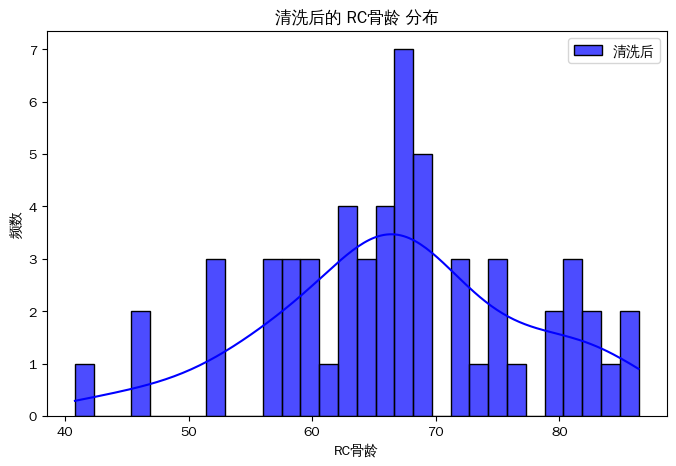

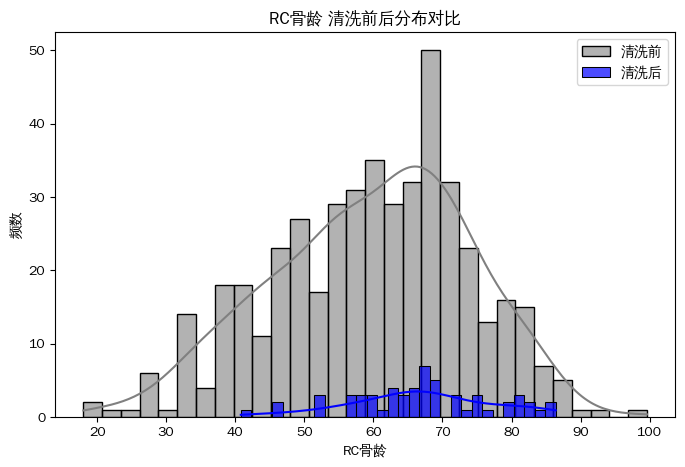

In [2]:
# **数据清洗后：RC骨龄的分布**
plt.figure(figsize=(8, 5))
sns.histplot(df_filtered["RC骨龄"], bins=30, kde=True, color="blue", alpha=0.7, label="清洗后")
plt.xlabel("RC骨龄")
plt.ylabel("频数")
plt.title("清洗后的 RC骨龄 分布")
plt.legend()
plt.show()

# **对比清洗前后的分布**
plt.figure(figsize=(8, 5))
sns.histplot(df["RC骨龄"], bins=30, kde=True, color="gray", alpha=0.6, label="清洗前")
sns.histplot(df_filtered["RC骨龄"], bins=30, kde=True, color="blue", alpha=0.7, label="清洗后")
plt.xlabel("RC骨龄")
plt.ylabel("频数")
plt.title("RC骨龄 清洗前后分布对比")
plt.legend()
plt.show()


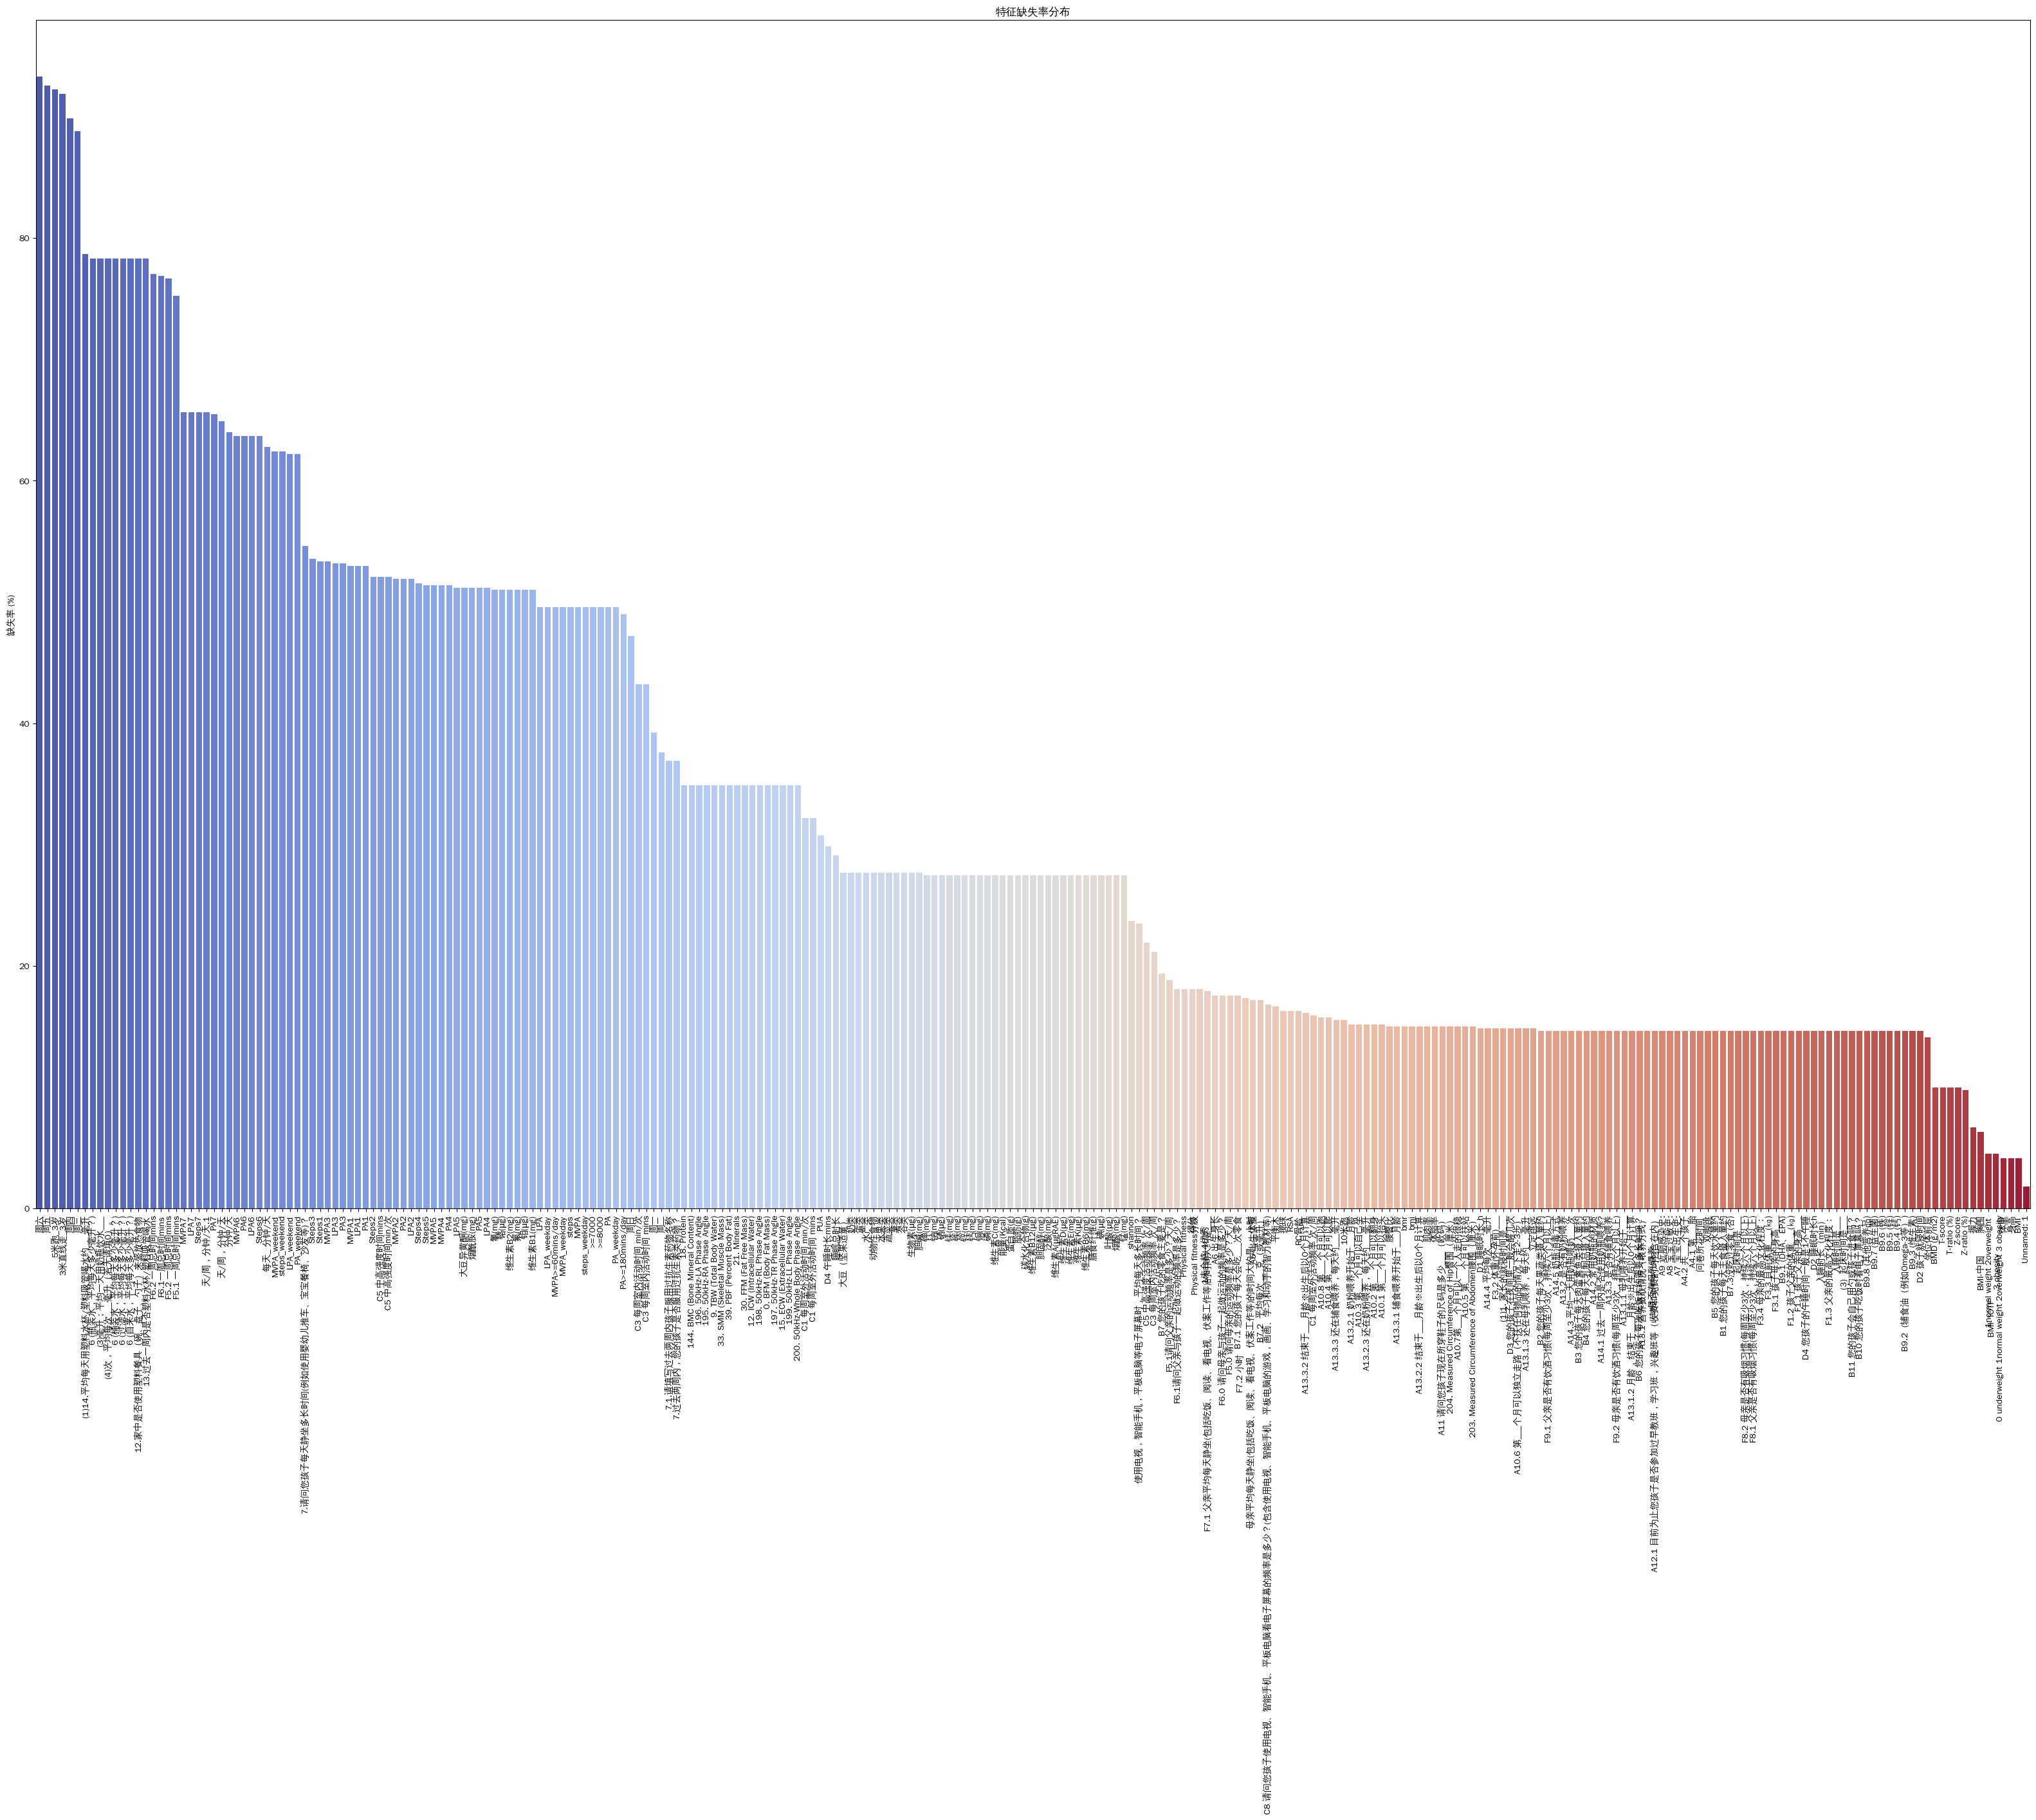

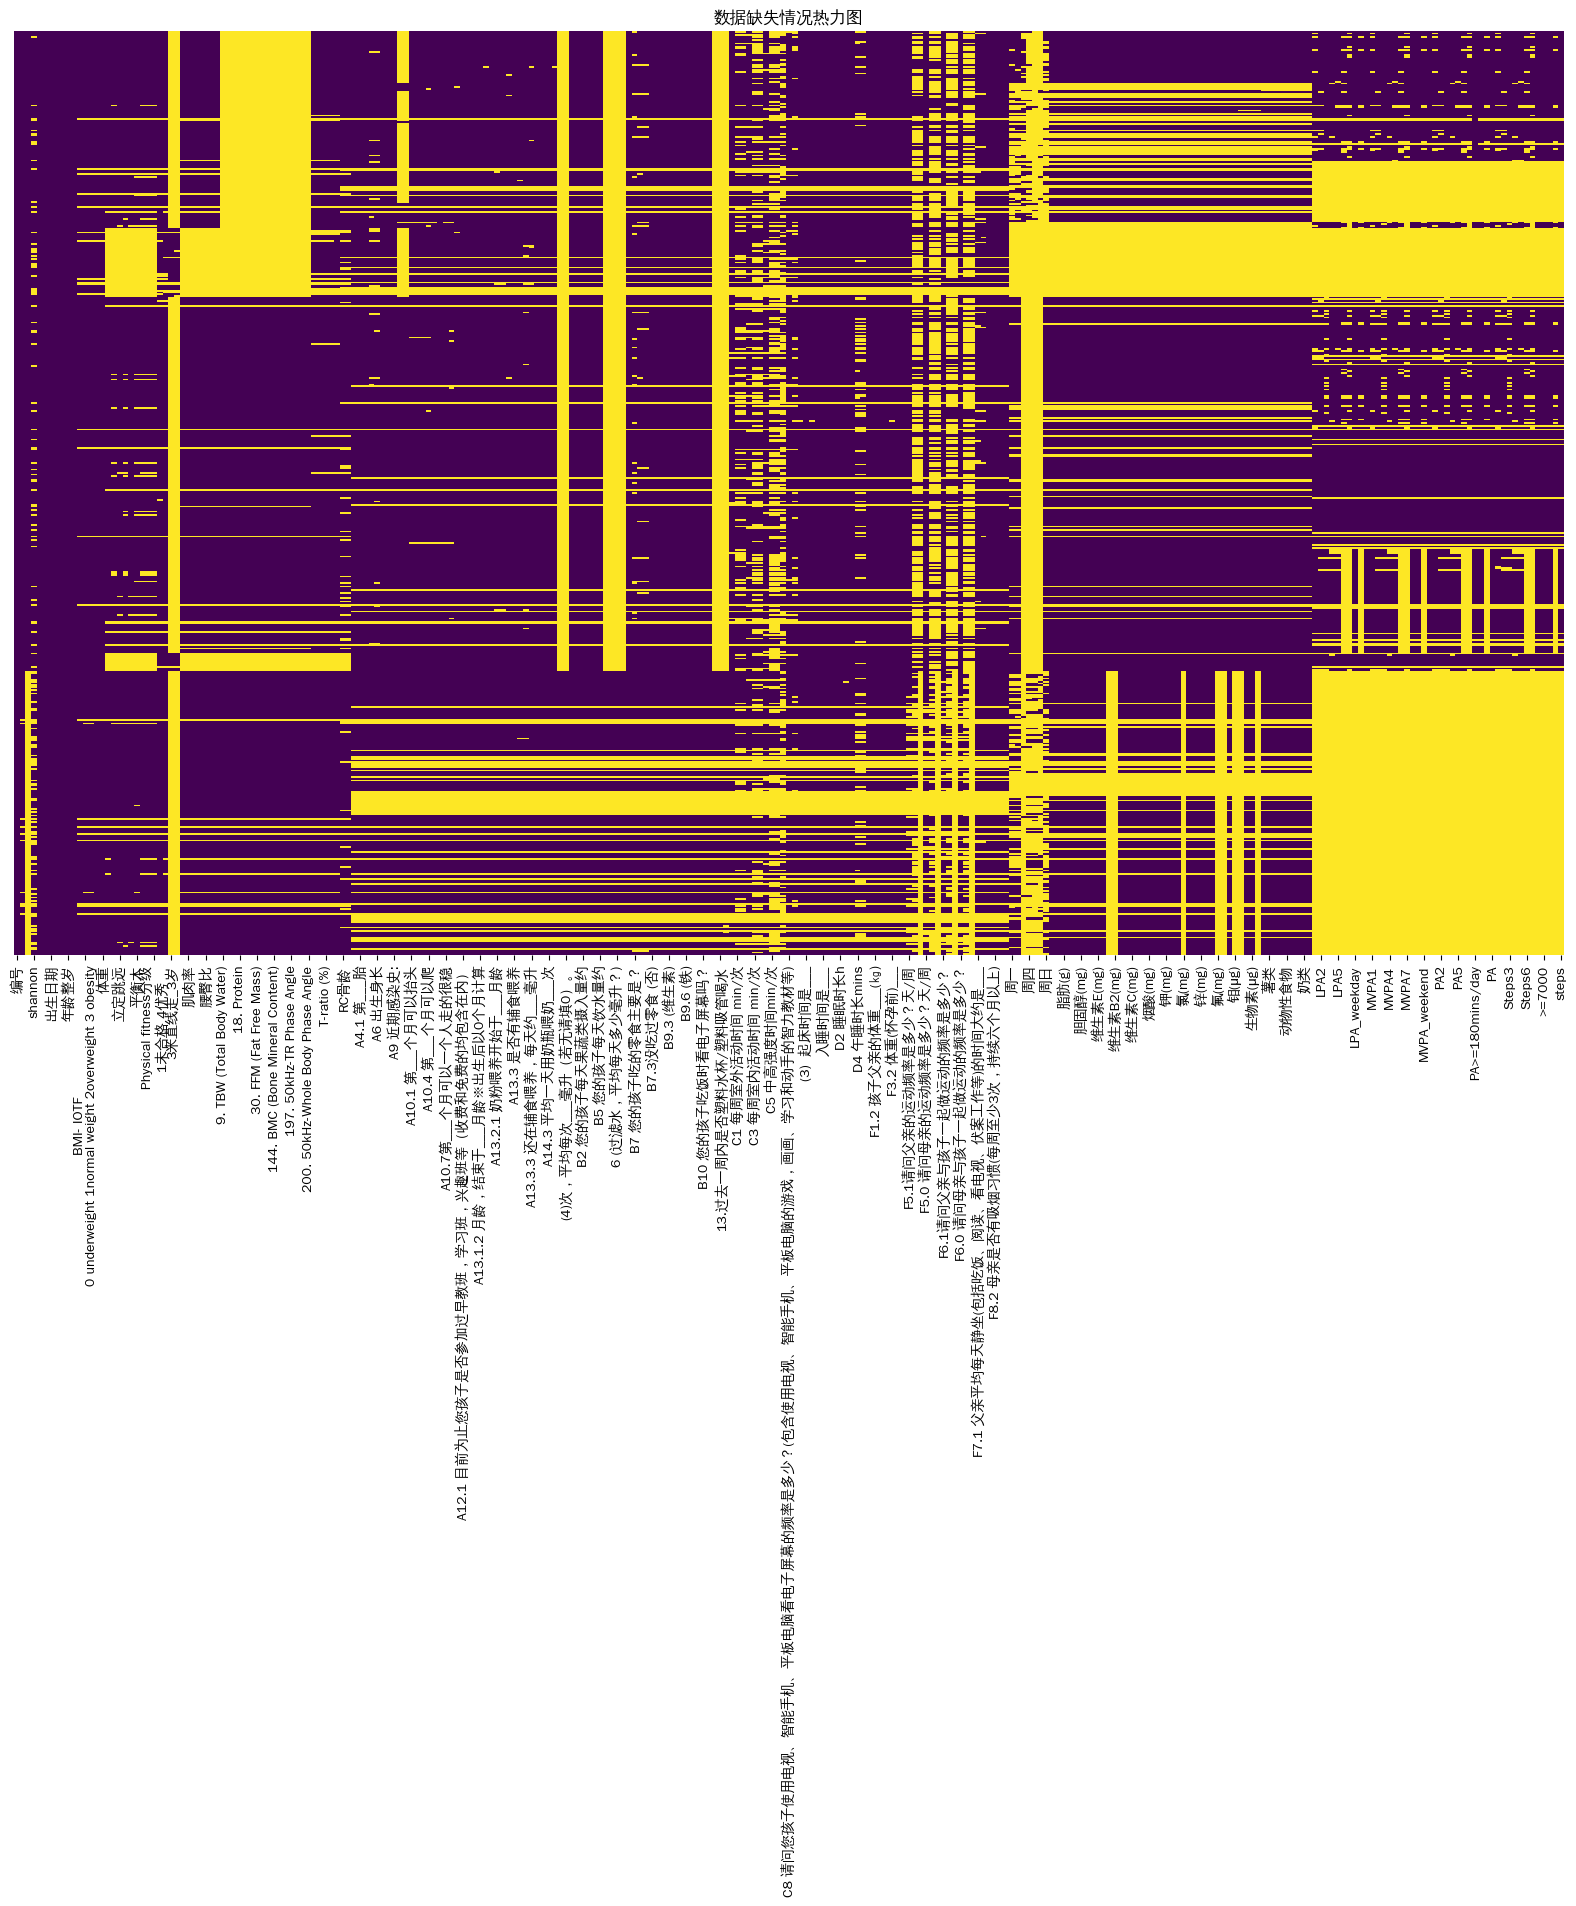

<Figure size 2000x1200 with 0 Axes>

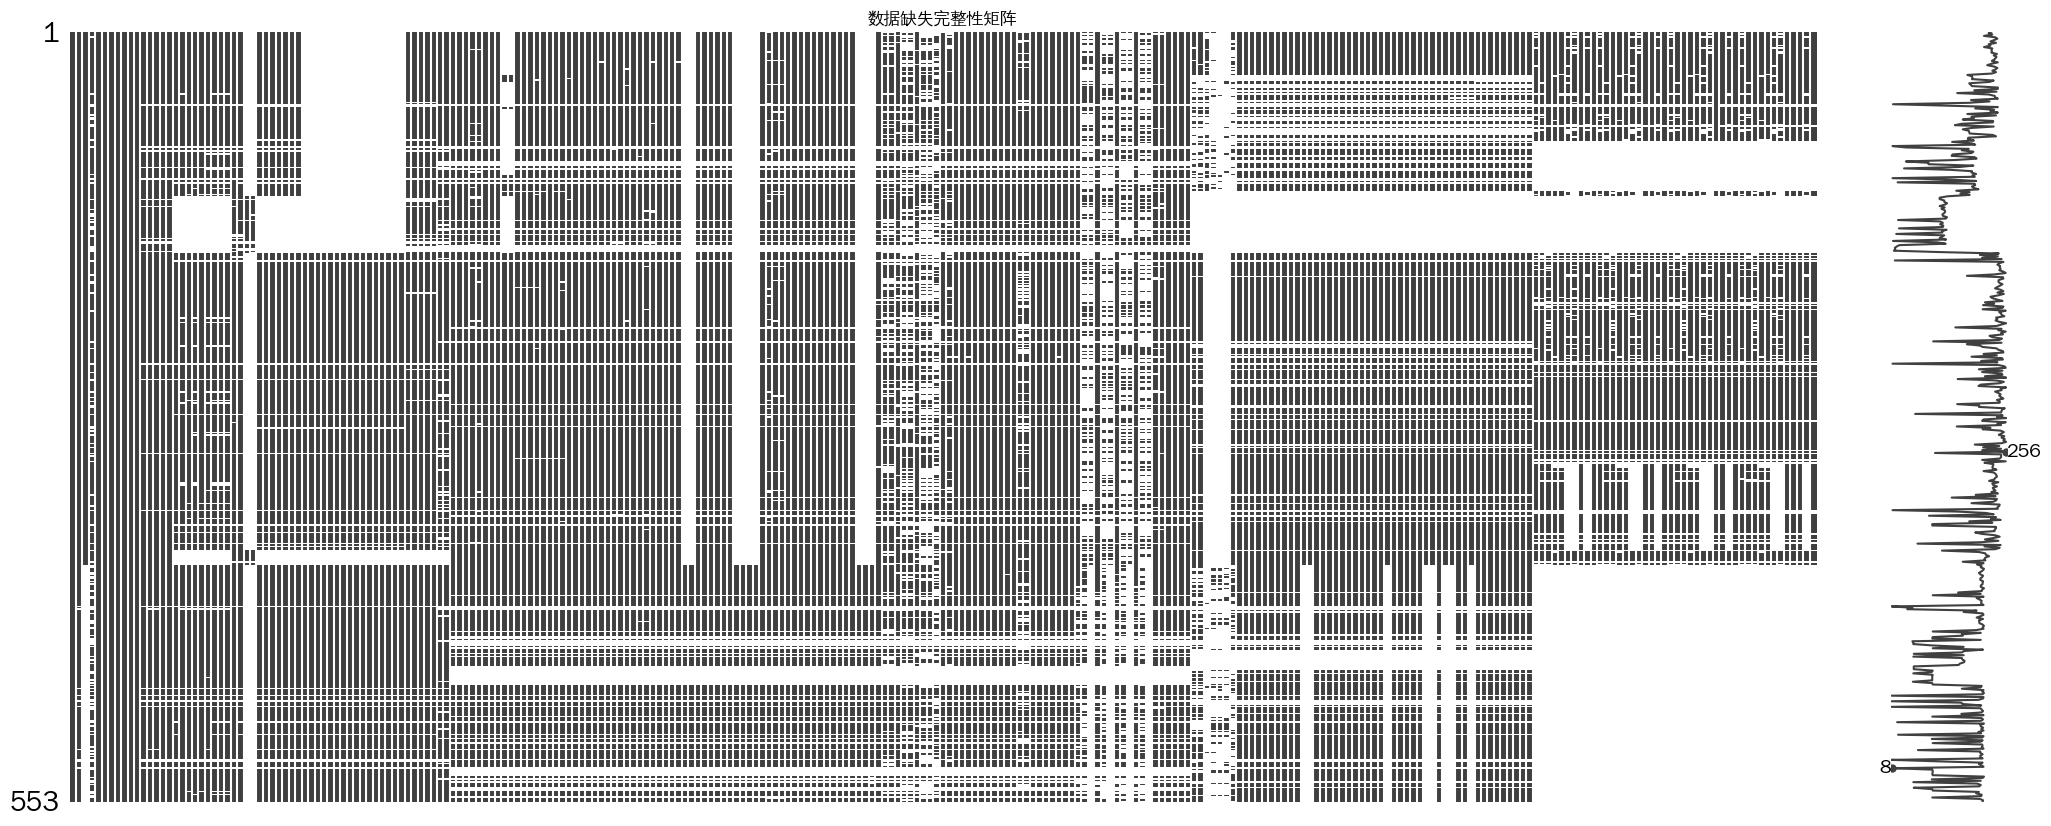

/private/workspace/environment/sam_adapt/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Figure size 2000x1200 with 0 Axes>

/private/workspace/environment/sam_adapt/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


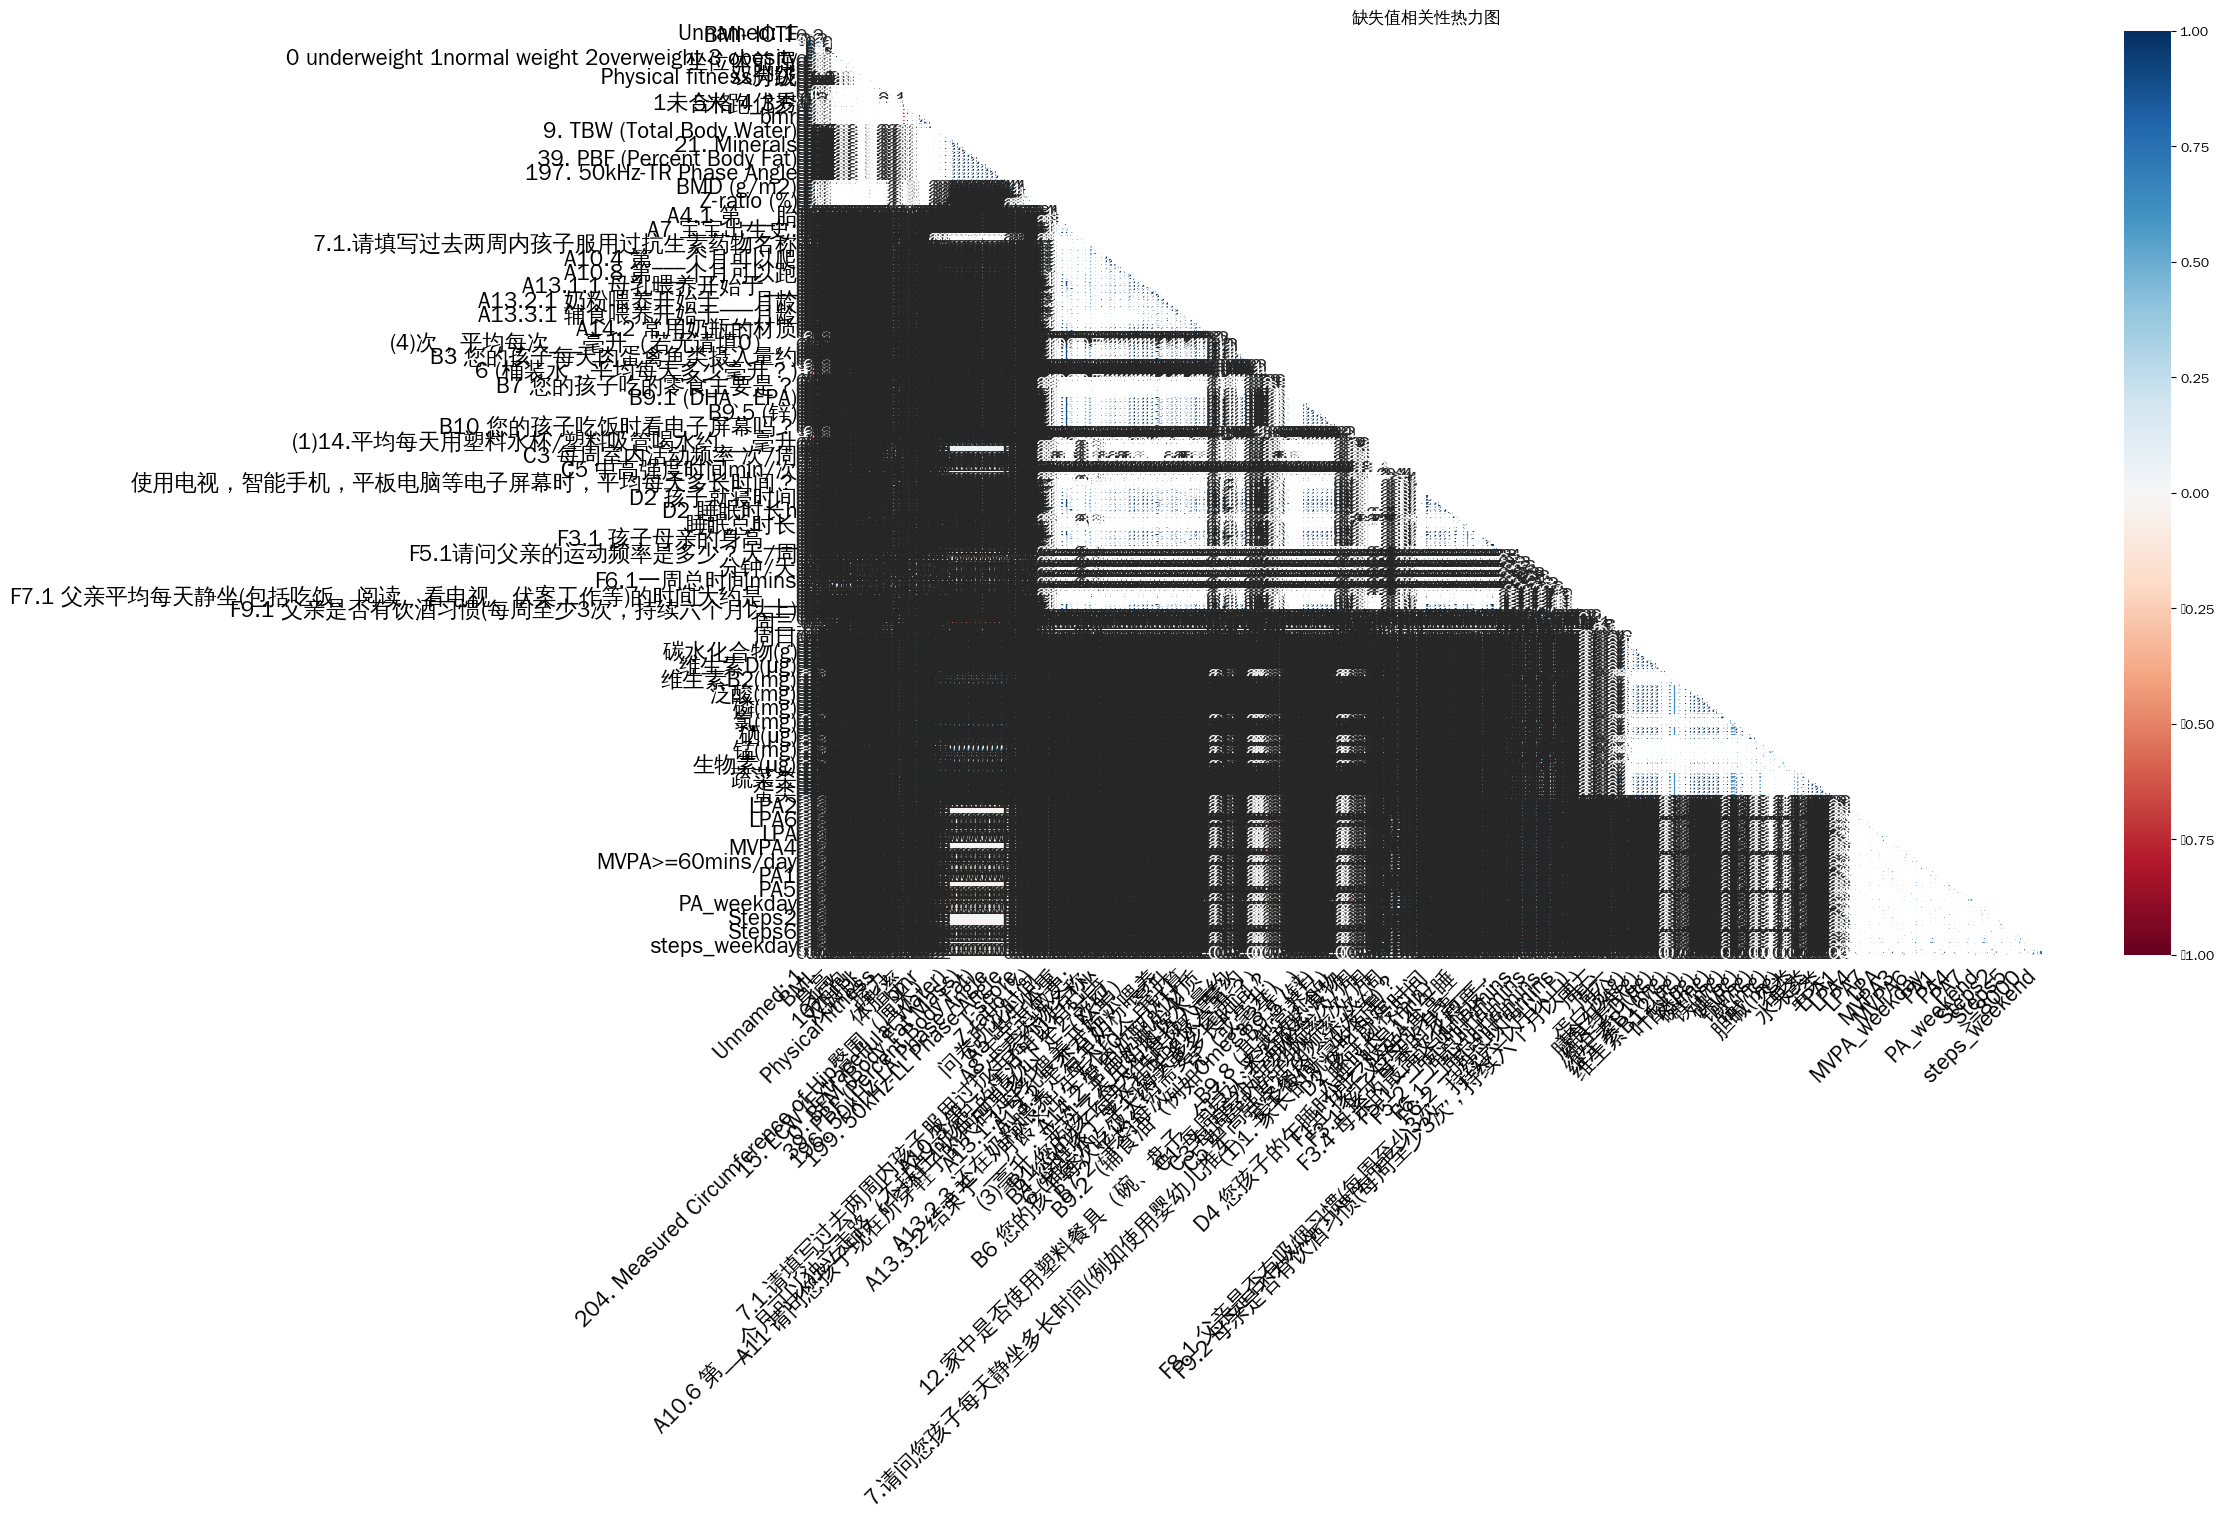

In [3]:
import missingno as msno 
# 统计每个特征的缺失率
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# 只绘制有缺失值的特征（如果全部没有缺失值，则不会绘制）
if not missing_percentage.empty:
    plt.figure(figsize=(40, 24))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette="coolwarm")
    plt.xticks(rotation=90)  # 旋转横坐标，避免重叠
    plt.ylabel("缺失率 (%)")
    plt.title("特征缺失率分布")
    plt.show()

# **可视化 2：缺失值热力图（缺失部分为亮色）**
plt.figure(figsize=(20, 12))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("数据缺失情况热力图")
plt.show()

# **可视化 3：完整性矩阵（missingno 库）**
plt.figure(figsize=(20, 12))
msno.matrix(df)
plt.title("数据缺失完整性矩阵")
plt.show()

# **可视化 4：特征间缺失值相关性**
plt.figure(figsize=(20, 12))
msno.heatmap(df)
plt.title("缺失值相关性热力图")
plt.show()


/private/workspace/environment/sam_adapt/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/private/workspace/environment/sam_adapt/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


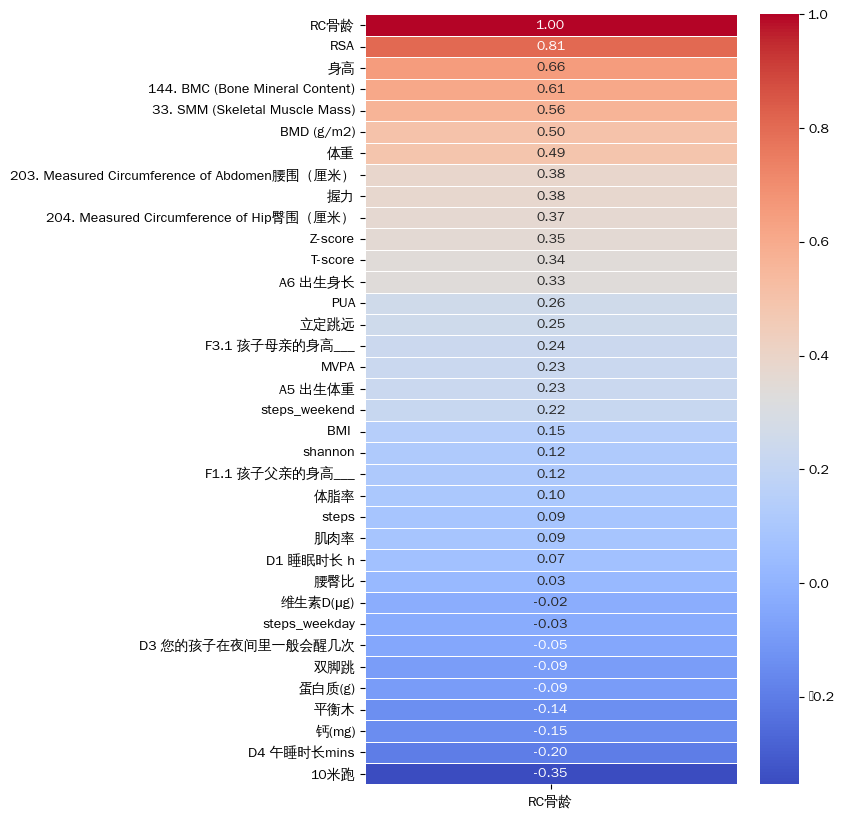

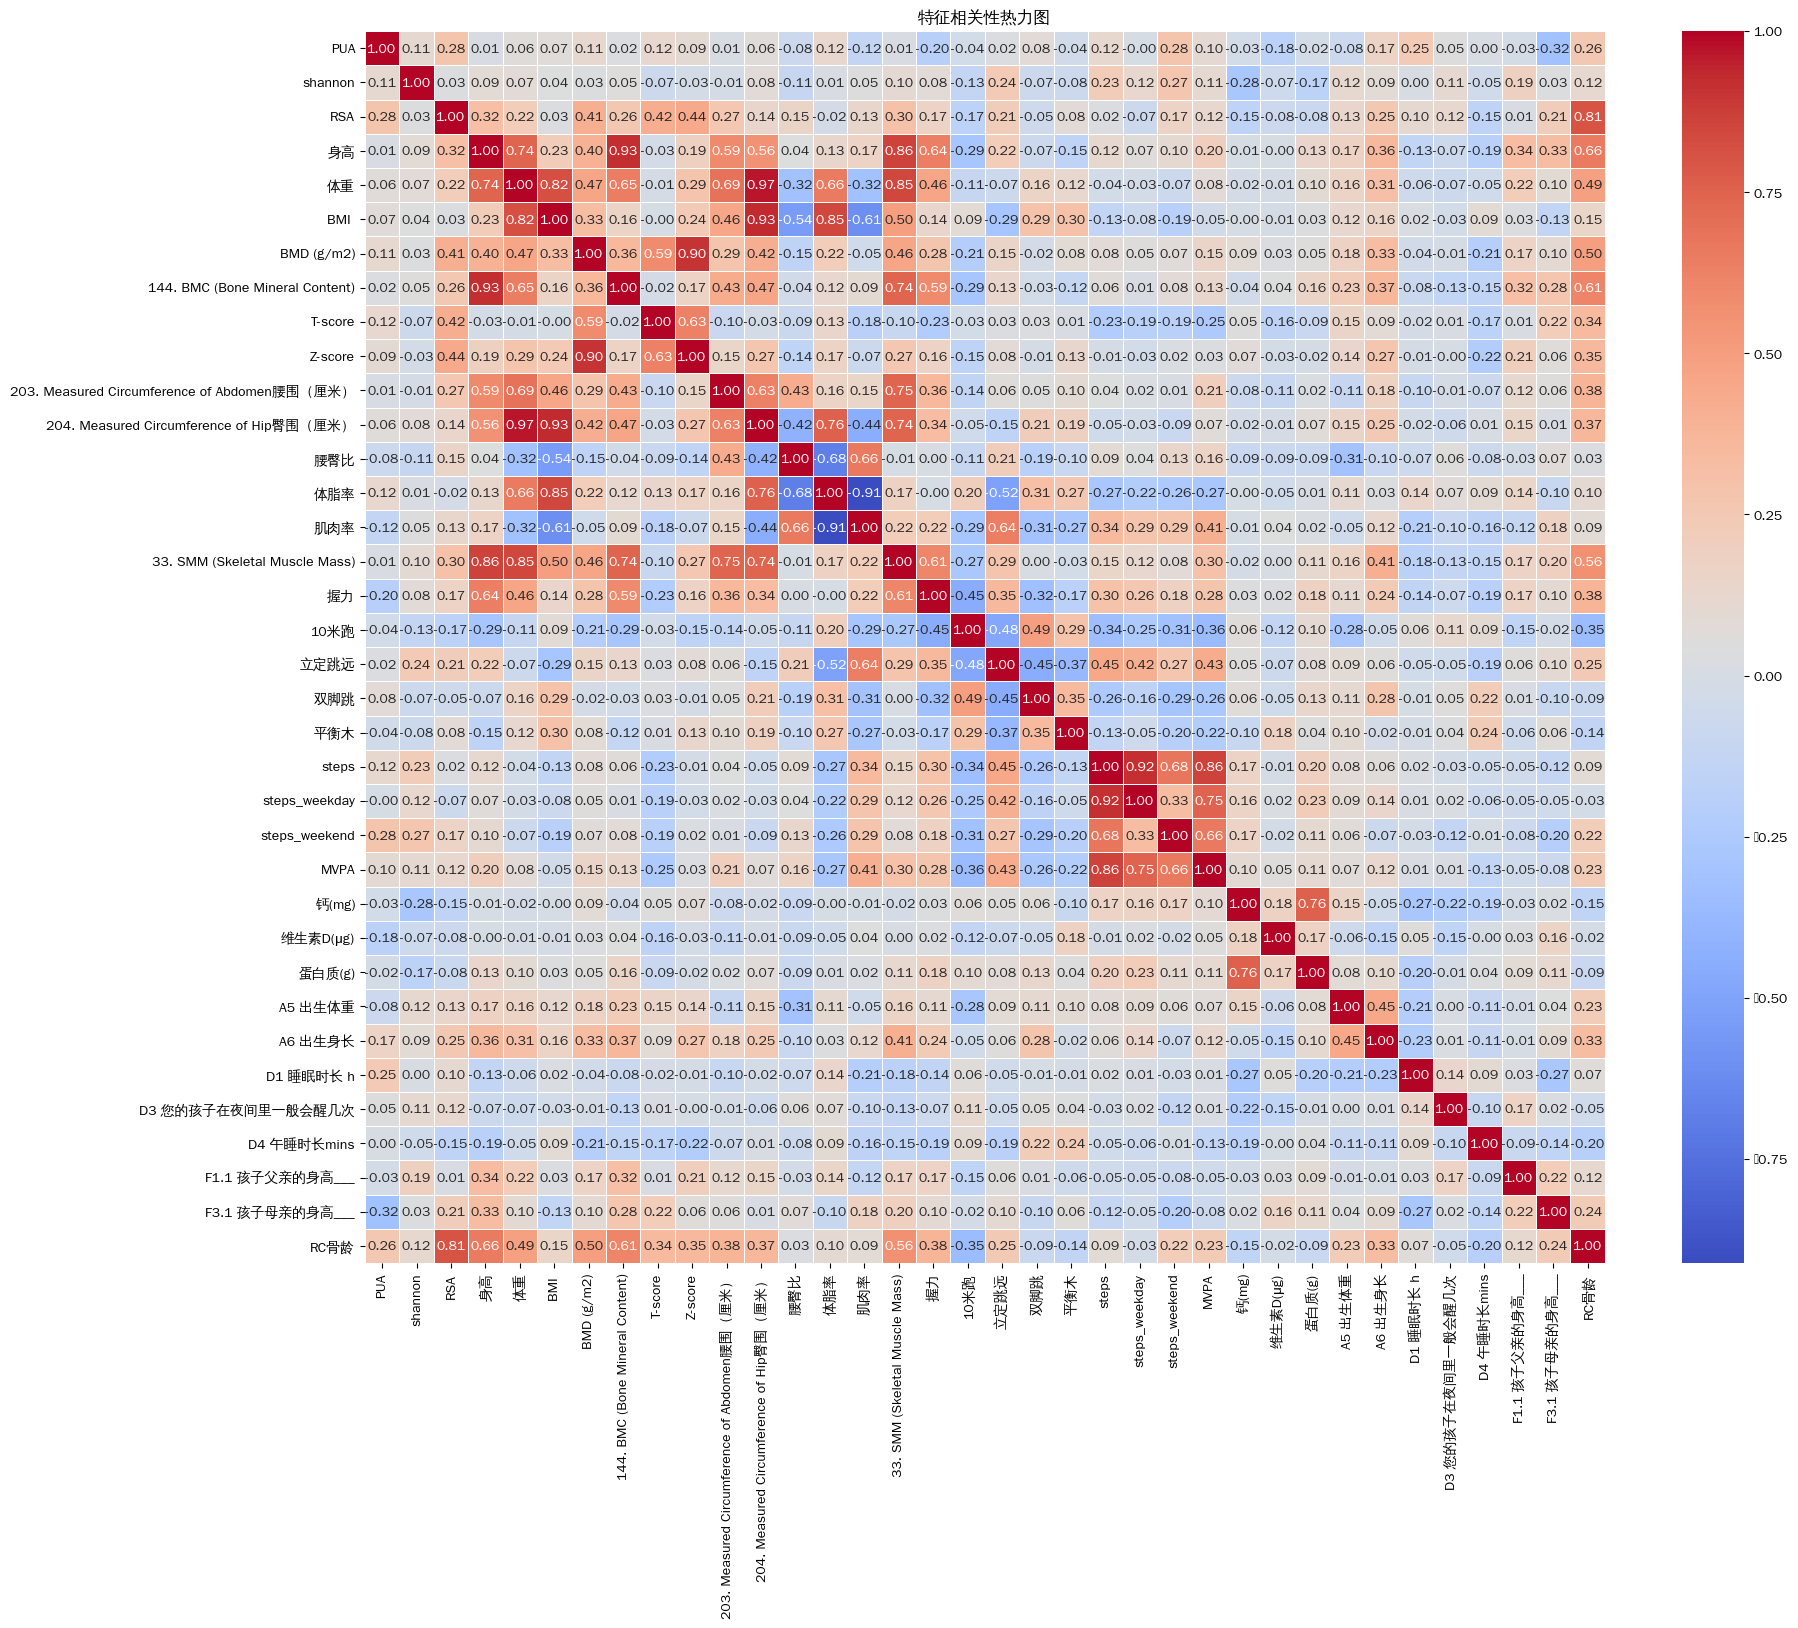

In [4]:
# 只保留数值型列
df_numeric = df_filtered.select_dtypes(include=["number"])

# 计算相关性矩阵
correlation_matrix = df_numeric.corr()

# 提取与 RC骨龄 相关的特征
rc_correlation = correlation_matrix[["RC骨龄"]].sort_values(by="RC骨龄", ascending=False)

# 绘制热力图
plt.figure(figsize=(6, 10))  # 适当调整图像大小
sns.heatmap(rc_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 计算RC骨龄与所有选定特征的相关性
correlation_matrix = df_filtered.corr()

# 提取RC骨龄相关性排序
rc_correlation = correlation_matrix["RC骨龄"].sort_values(ascending=False)

# 绘制相关矩阵热力图
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("特征相关性热力图")
plt.show()



In [ ]:
# 选取与 RC骨龄 相关性 ≥ 0.4 的特征
selected_features = correlation_matrix["RC骨龄"][correlation_matrix["RC骨龄"] >= 0.4].index.tolist()
elected_features.remove("RC骨龄")  # 确保移除 RC骨龄
# 提取这些特征的数据，并去除缺失值
df_selected = df[selected_features+"RC骨龄"].dropna()
print(f"选取的特征数量: {len(selected_features)}，有效样本数: {df_selected.shape[0]}")

选取的特征数量: 7，有效样本数: 327


/private/workspace/environment/sam_adapt/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


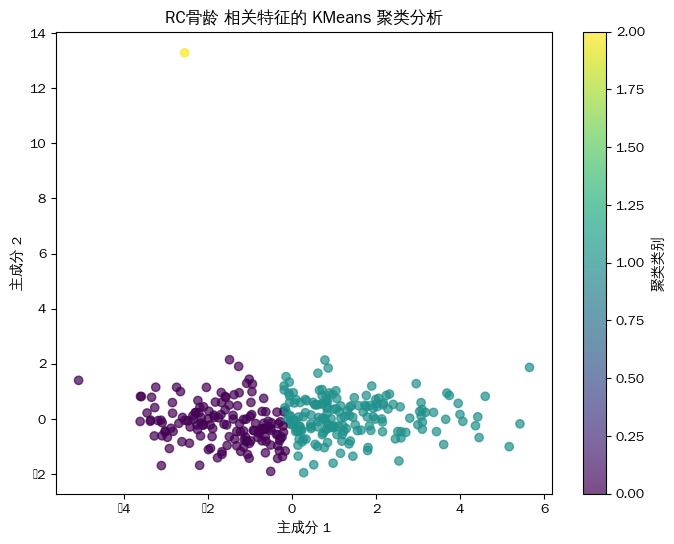

KeyError: 'RC骨龄'

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np



# **数据标准化（不包含 `RC骨龄` 和 `年龄（月）`）**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected[selected_features])  # 仅基于选定特征进行标准化

# **进行 KMeans 聚类分析**
num_clusters = 8  # 设定聚类数量（可以调整）
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_selected["聚类类别"] = kmeans.fit_predict(X_scaled)

# **PCA 降维到 2 维进行可视化**
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# **绘制聚类散点图**
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_selected["聚类类别"], cmap="viridis", alpha=0.7)
plt.xlabel("主成分 1")
plt.ylabel("主成分 2")
plt.title("RC骨龄 相关特征的 KMeans 聚类分析（不含 RC骨龄）")
plt.colorbar(label="聚类类别")
plt.show()

# **按 6 个月为单位对年龄进行分箱**
df_selected["年龄分组"] = pd.cut(df_selected["RC骨龄"], bins=np.arange(0, df_selected["RC骨龄"].max() + 6, 6), right=False)

# **统计每个年龄分组的聚类分布**
age_cluster_counts = df_selected.groupby(["年龄分组", "聚类类别"]).size().unstack(fill_value=0)

# **绘制年龄分组的聚类分布条形图**
age_cluster_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("RC骨龄")
plt.ylabel("样本数")
plt.title("不同年龄分组的 KMeans 聚类分布")
plt.legend(title="聚类类别")
plt.xticks(rotation=45)
plt.show()

# **输出每个聚类类别的统计信息**
cluster_counts = df_selected["聚类类别"].value_counts().reset_index()
cluster_counts.columns = ["聚类类别", "样本数"]
print("\n=== 各聚类类别的样本数量 ===")
print(cluster_counts)

# **绘制不同聚类类别的 RC骨龄 分布**
plt.figure(figsize=(8, 5))
sns.boxplot(x="聚类类别", y="RC骨龄", data=df_selected)
plt.xlabel("聚类类别")
plt.ylabel("RC骨龄")
plt.title("不同聚类类别的 RC骨龄 分布")
plt.show()